In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
from matplotlib.dates import MonthLocator, DateFormatter

# Enable inline plotting for Jupyter Notebook
%matplotlib inline


In [12]:
# Read the data into a pandas DataFrame
df = pd.read_csv("../api_data/hourly_api_data.csv")

df['Consumption'] = df['Consumption']/1000

df.head()


,Hour,Measurement,Phase,Consumption
0,2022-09-28 12:00:00,Grid Organi lbc,PHASEA,3.1730
1,2022-09-28 12:00:00,Grid Organi lbc,PHASEB,3.1730
2,2022-09-28 12:00:00,Grid Organi lbc,PHASEC,2.6550
3,2022-09-28 12:00:00,Chargers,PHASEA,2.4090
4,2022-09-28 13:00:00,Grid Organi lbc,PHASEA,6.9317


In [13]:
# Display basic information and summary statistics.
print("DataFrame Info:")
df.info()

print("\nSummary Statistics:")
print(df.describe())

print("\nFirst and last 5 Rows:")
df.head() , df.tail()




DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169548 entries, 0 to 169547
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Hour         169548 non-null  object 
 1   Measurement  169548 non-null  object 
 2   Phase        169548 non-null  object 
 3   Consumption  169548 non-null  float64
dtypes: float64(1), object(3)
memory usage: 5.2+ MB

Summary Statistics:
         Consumption
count  169548.000000
mean        3.881931
std         5.569419
min       -10.871100
25%         0.031800
50%         3.156500
75%         4.806300
max        53.921000

First and last 5 Rows:


(                  Hour      Measurement   Phase  Consumption
 0  2022-09-28 12:00:00  Grid Organi lbc  PHASEA       3.1730
 1  2022-09-28 12:00:00  Grid Organi lbc  PHASEB       3.1730
 2  2022-09-28 12:00:00  Grid Organi lbc  PHASEC       2.6550
 3  2022-09-28 12:00:00         Chargers  PHASEA       2.4090
 4  2022-09-28 13:00:00  Grid Organi lbc  PHASEA       6.9317,
                        Hour         Measurement   Phase  Consumption
 169543  2025-02-19 12:00:00               Solar  PHASEB       4.2061
 169544  2025-02-19 12:00:00               Solar  PHASEC       4.2700
 169545  2025-02-19 12:00:00  Chargers achteraan  PHASEA       4.2337
 169546  2025-02-19 12:00:00  Chargers achteraan  PHASEB       9.2364
 169547  2025-02-19 12:00:00  Chargers achteraan  PHASEC       9.0655)

In [14]:
# Convert 'Hour' column to datetime format.
df['Hour'] = pd.to_datetime(df['Hour'])  
print("Data after converting Hour to datetime:")
df.head()


# Check for missing values
print("\nMissing values by column:")
print(df.isnull().sum())



Data after converting Hour to datetime:

Missing values by column:
Hour           0
Measurement    0
Phase          0
Consumption    0
dtype: int64


In [15]:
# Create a pivot table to show total consumption per Month for each Measurement.
df_pivot = df.pivot_table(index='Hour', columns='Measurement', values='Consumption', aggfunc='sum')
print("Pivot Table (Hourly Consumption by Measurement):")
print(df_pivot)


Pivot Table (Hourly Consumption by Measurement):
Measurement          Chargers  Chargers achteraan  Grid Organi lbc    Solar
Hour                                                                       
2022-09-28 12:00:00    2.4090                 NaN           9.0010      NaN
2022-09-28 13:00:00    6.0426                 NaN          20.3787      NaN
2022-09-28 14:00:00    6.0271                 NaN          20.5578      NaN
2022-09-28 15:00:00    6.0016                 NaN          19.3390      NaN
2022-09-28 16:00:00    7.1028                 NaN          18.7600      NaN
...                       ...                 ...              ...      ...
2025-02-19 08:00:00   26.5255             19.4585          71.7051   5.1333
2025-02-19 09:00:00   46.7752             59.9183         130.2653   7.8705
2025-02-19 10:00:00   40.0280             61.5783         119.1813   6.5210
2025-02-19 11:00:00   36.3033             48.6231          97.1124  10.4179
2025-02-19 12:00:00   28.7226          

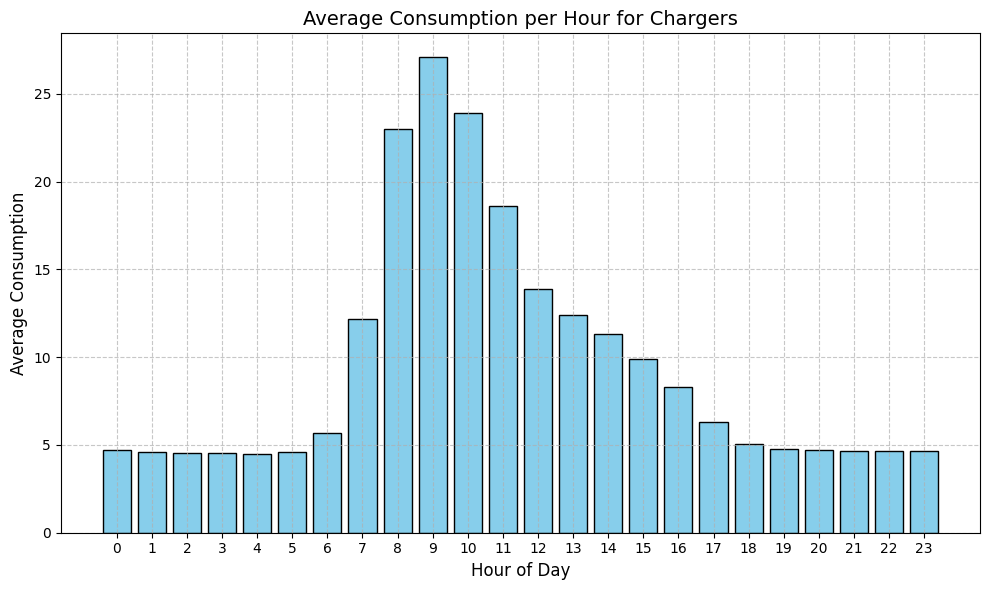


Average Consumption per Hour for Chargers:
Hour
0      4.68
1      4.59
2      4.53
3      4.52
4      4.51
5      4.59
6      5.65
7     12.14
8     22.97
9     27.08
10    23.88
11    18.62
12    13.87
13    12.39
14    11.34
15     9.91
16     8.29
17     6.28
18     5.06
19     4.74
20     4.73
21     4.67
22     4.68
23     4.65
Name: Chargers, dtype: float64


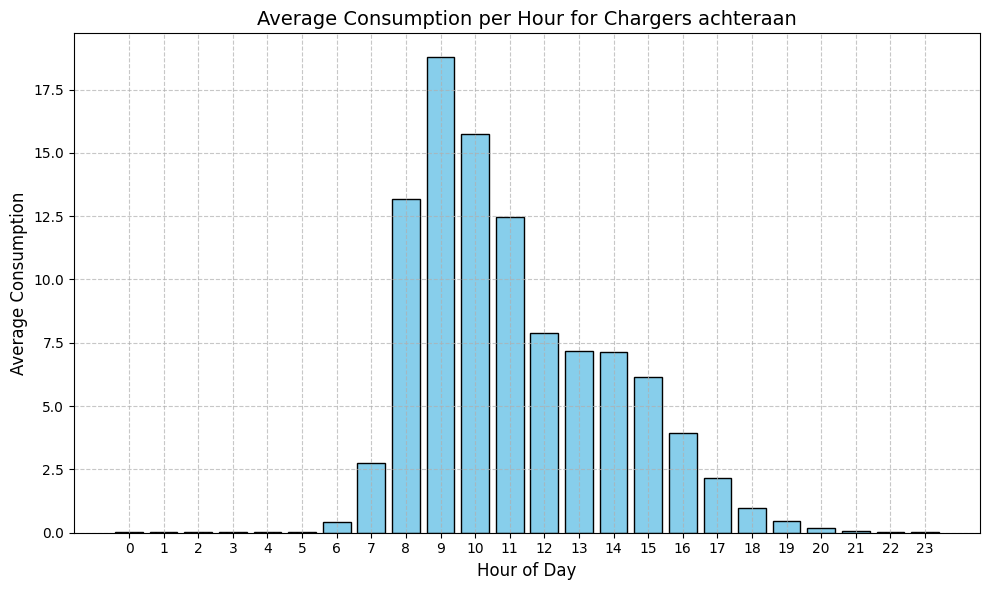


Average Consumption per Hour for Chargers achteraan:
Hour
0      0.04
1      0.03
2      0.03
3      0.03
4      0.03
5      0.03
6      0.43
7      2.74
8     13.16
9     18.78
10    15.74
11    12.47
12     7.89
13     7.17
14     7.13
15     6.17
16     3.95
17     2.15
18     0.99
19     0.48
20     0.18
21     0.06
22     0.04
23     0.04
Name: Chargers achteraan, dtype: float64


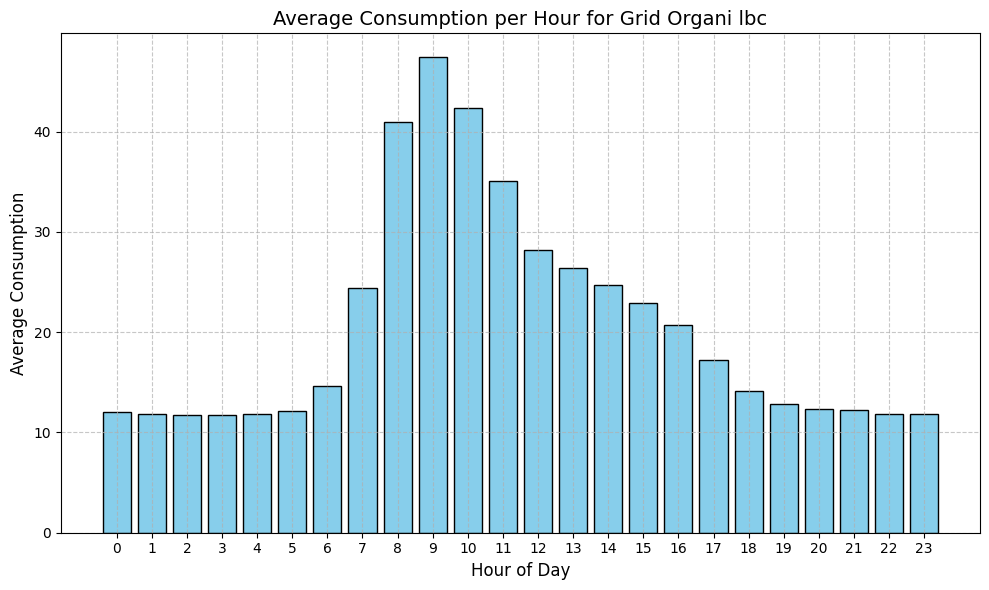


Average Consumption per Hour for Grid Organi lbc:
Hour
0     12.03
1     11.80
2     11.76
3     11.79
4     11.81
5     12.12
6     14.62
7     24.39
8     41.02
9     47.45
10    42.38
11    35.13
12    28.21
13    26.42
14    24.75
15    22.97
16    20.74
17    17.20
18    14.17
19    12.82
20    12.35
21    12.26
22    11.86
23    11.81
Name: Grid Organi lbc, dtype: float64


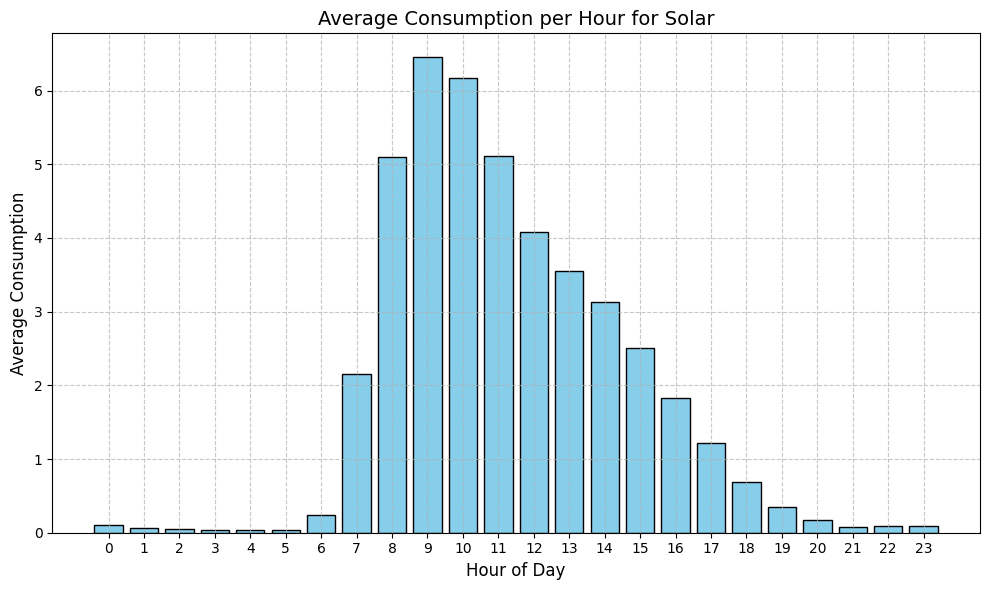


Average Consumption per Hour for Solar:
Hour
0     0.10
1     0.06
2     0.04
3     0.04
4     0.04
5     0.04
6     0.24
7     2.16
8     5.10
9     6.45
10    6.17
11    5.12
12    4.09
13    3.55
14    3.13
15    2.51
16    1.83
17    1.21
18    0.68
19    0.35
20    0.17
21    0.08
22    0.09
23    0.09
Name: Solar, dtype: float64


In [16]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Loop through each measurement (column) in the pivot DataFrame
for measurement in df_pivot.columns:
    # Group by hour (0 to 23) using the datetime index and calculate the mean
    avg_by_hour = df_pivot[measurement].groupby(df_pivot.index.hour).mean()
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Create a bar plot for the average consumption per hour
    ax.bar(avg_by_hour.index, avg_by_hour, color='skyblue', edgecolor='black')
    
    # Set title and labels for each plot
    ax.set_title(f'Average Consumption per Hour for {measurement}', fontsize=14)
    ax.set_xlabel('Hour of Day', fontsize=12)
    ax.set_ylabel('Average Consumption', fontsize=12)
    
    # Since we're dealing with hours, set x-axis ticks from 0 to 23
    ax.set_xticks(range(24))
    
    # Optionally, if you still want to use mdates for other time formatting, 
    # you could format the axis here when working with full datetime data.
    # In this case (grouped by hour) mdates is not needed.
    
    # Add grid and layout settings
    ax.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    
    # Display the plot
    plt.show()
    
    # Print the average consumption values per hour
    print(f"\nAverage Consumption per Hour for {measurement}:")
    print(avg_by_hour.round(2))


In [17]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169548 entries, 0 to 169547
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Hour         169548 non-null  datetime64[ns]
 1   Measurement  169548 non-null  object        
 2   Phase        169548 non-null  object        
 3   Consumption  169548 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 5.2+ MB


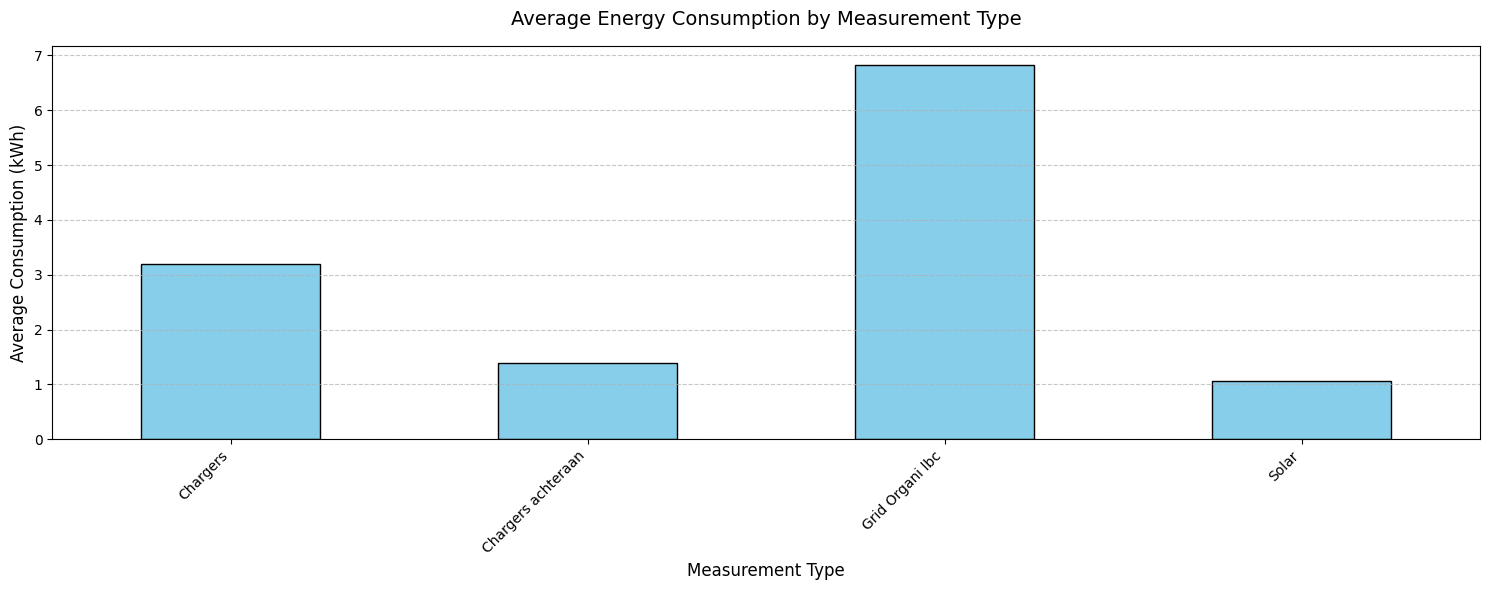


Average Consumption by Measurement Type:
Measurement
Chargers              3.20
Chargers achteraan    1.39
Grid Organi lbc       6.83
Solar                 1.07
Name: Consumption, dtype: float64


In [18]:
# Create a more informative bar plot of energy consumption
plt.figure(figsize=(15, 6))
df.groupby(['Measurement'])['Consumption'].mean().plot(
    kind='bar',
    color='skyblue',
    edgecolor='black'
)

# Customize the plot
plt.title('Average Energy Consumption by Measurement Type', fontsize=14, pad=15)
plt.xlabel('Measurement Type', fontsize=12)
plt.ylabel('Average Consumption (kWh)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

# You might also want to see the actual values
print("\nAverage Consumption by Measurement Type:")
print(df.groupby(['Measurement'])['Consumption'].mean().round(2))

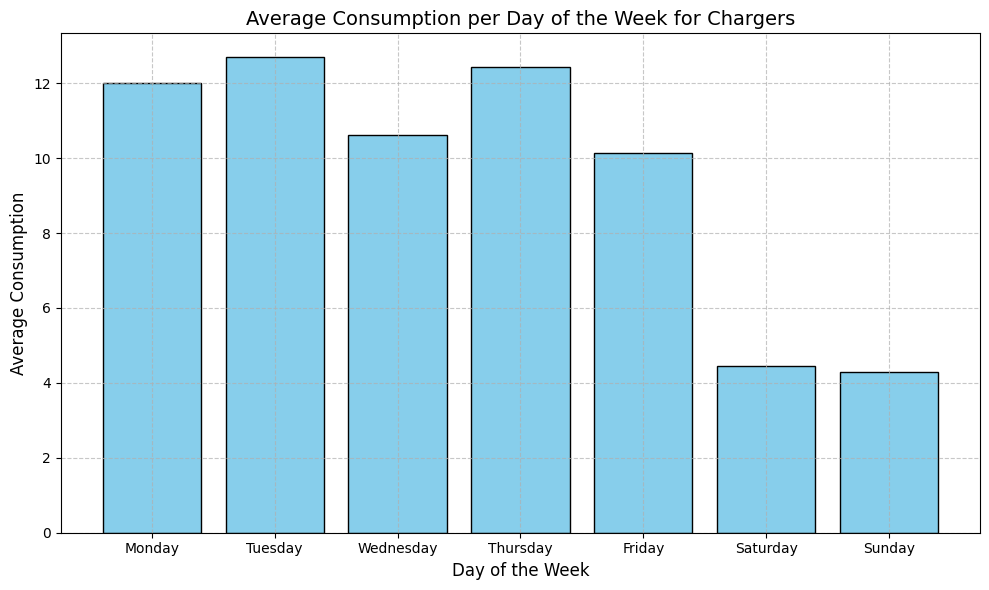


Average Consumption per Day of the Week for Chargers:
Hour
Monday       12.00
Tuesday      12.70
Wednesday    10.61
Thursday     12.42
Friday       10.13
Saturday      4.46
Sunday        4.28
Name: Chargers, dtype: float64


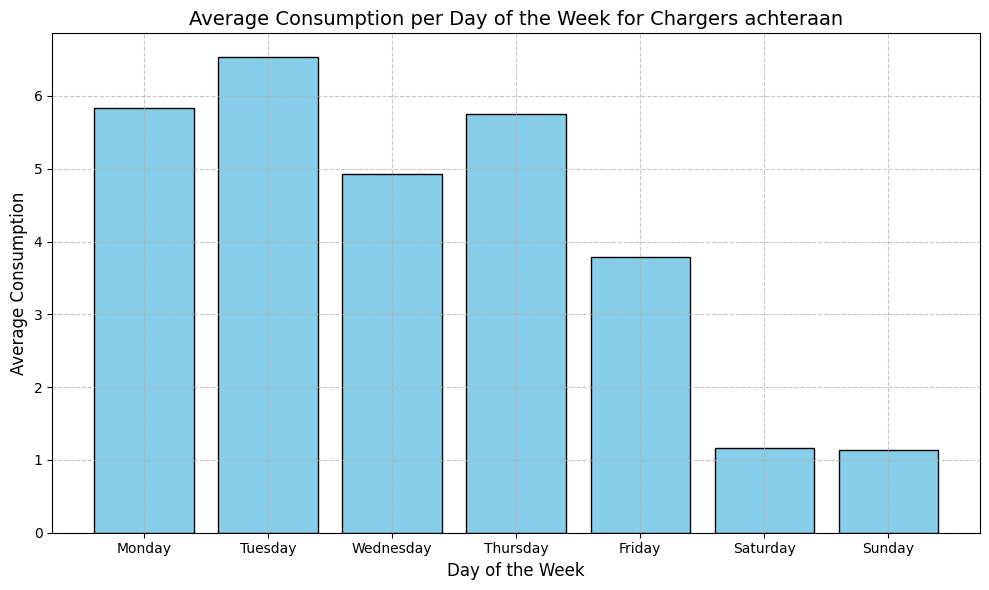


Average Consumption per Day of the Week for Chargers achteraan:
Hour
Monday       5.84
Tuesday      6.53
Wednesday    4.93
Thursday     5.75
Friday       3.79
Saturday     1.17
Sunday       1.13
Name: Chargers achteraan, dtype: float64


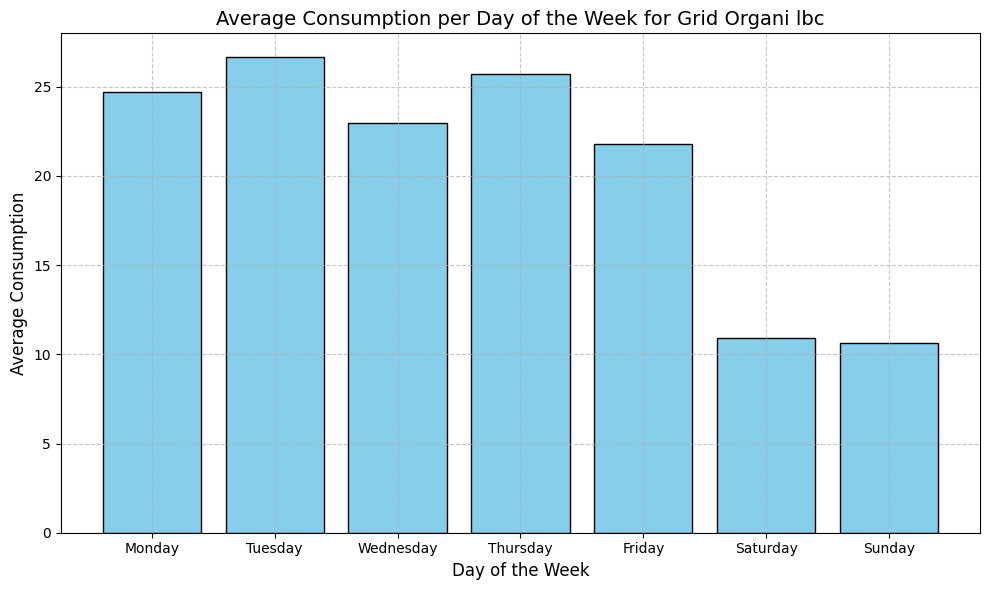


Average Consumption per Day of the Week for Grid Organi lbc:
Hour
Monday       24.69
Tuesday      26.67
Wednesday    23.00
Thursday     25.70
Friday       21.82
Saturday     10.91
Sunday       10.64
Name: Grid Organi lbc, dtype: float64


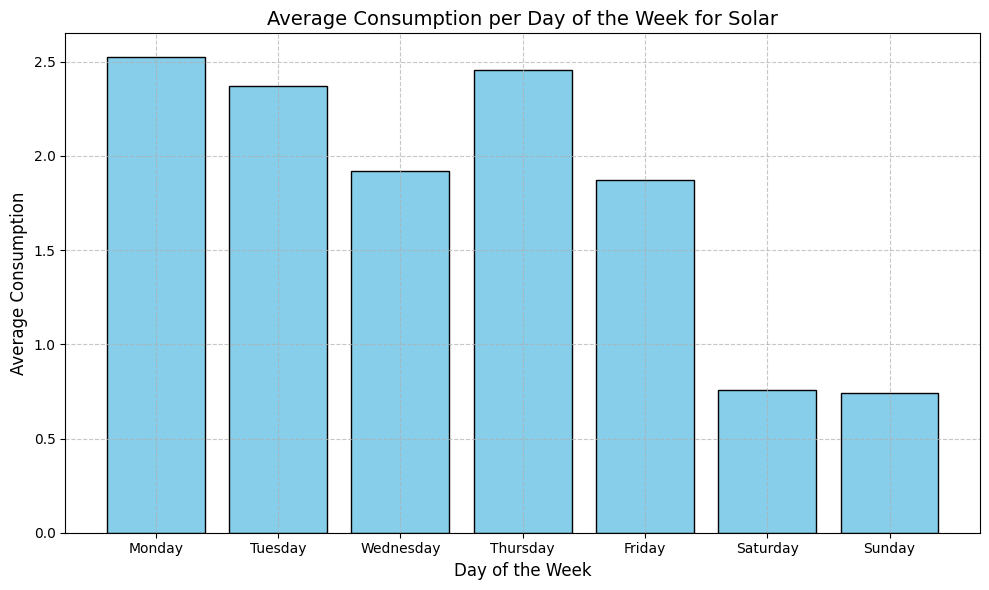


Average Consumption per Day of the Week for Solar:
Hour
Monday       2.52
Tuesday      2.37
Wednesday    1.92
Thursday     2.46
Friday       1.87
Saturday     0.76
Sunday       0.74
Name: Solar, dtype: float64


In [21]:
import matplotlib.pyplot as plt

# Create a mapping from day numbers (0=Monday, ..., 6=Sunday) to weekday names
weekday_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 
                 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

# Loop through each measurement (column) in the pivot DataFrame
for measurement in df_pivot.columns:
    # Group the data by day of the week (using the datetime index) and compute the mean
    avg_by_day = df_pivot[measurement].groupby(df_pivot.index.dayofweek).mean()
    
    # Map the numeric day-of-week index to weekday names
    avg_by_day.index = avg_by_day.index.map(lambda x: weekday_names[x])
    
    # Plot the average consumption per day of the week
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(avg_by_day.index, avg_by_day, color='skyblue', edgecolor='black')
    
    # Set title and labels for the plot
    ax.set_title(f'Average Consumption per Day of the Week for {measurement}', fontsize=14)
    ax.set_xlabel('Day of the Week', fontsize=12)
    ax.set_ylabel('Average Consumption', fontsize=12)
    
    # Add grid and layout settings
    ax.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    
    # Print the average consumption values per day of the week
    print(f"\nAverage Consumption per Day of the Week for {measurement}:")
    print(avg_by_day.round(2))


Extracted Time Series:
                         Measurement   Phase  Consumption
Hour                                                     
2022-09-28 12:00:00  Grid Organi lbc  PHASEA       3173.0
2022-09-28 12:00:00  Grid Organi lbc  PHASEB       3173.0
2022-09-28 12:00:00  Grid Organi lbc  PHASEC       2655.0
2022-09-28 13:00:00  Grid Organi lbc  PHASEA       6931.7
2022-09-28 13:00:00  Grid Organi lbc  PHASEB       6931.7
2022-09-28 13:00:00  Grid Organi lbc  PHASEC       6515.3
2022-09-28 14:00:00  Grid Organi lbc  PHASEA       7011.1
2022-09-28 14:00:00  Grid Organi lbc  PHASEB       7011.1
2022-09-28 14:00:00  Grid Organi lbc  PHASEC       6535.6

ADF Test Results:
ADF Statistic: -14.8971
p-value: 0.0000
Critical Value (1%): -5.3543
Critical Value (5%): -3.6462
Critical Value (10%): -2.9012

KPSS Test Results:
KPSS Statistic: 0.4115
p-value: 0.0722
num lags: 1
Critical Value (10%): 0.3470
Critical Value (5%): 0.4630
Critical Value (2.5%): 0.5740
Critical Value (1%): 0.7390


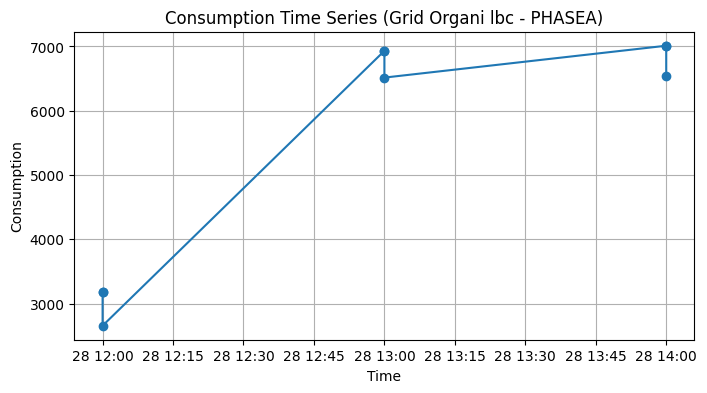

In [23]:
import pandas as pd
import io
from statsmodels.tsa.stattools import adfuller, kpss
import matplotlib.pyplot as plt


# Filter the data to select one series: "Grid Organi lbc" for "PHASEA"
series = df[(df['Measurement'] == 'Grid Organi lbc')].copy()

# Set the Hour column as the DataFrame index and sort by time
series.set_index('Hour', inplace=True)
series.sort_index(inplace=True)

print("Extracted Time Series:")
print(series)

# -----------------------------
# Augmented Dickey-Fuller (ADF) Test
# -----------------------------
adf_result = adfuller(series['Consumption'])
print("\nADF Test Results:")
print("ADF Statistic: {:.4f}".format(adf_result[0]))
print("p-value: {:.4f}".format(adf_result[1]))
for key, value in adf_result[4].items():
    print("Critical Value ({}): {:.4f}".format(key, value))

# -----------------------------
# KPSS Test
# -----------------------------
def kpss_test(series, **kwargs):
    statistic, p_value, n_lags, critical_values = kpss(series, **kwargs)
    print("\nKPSS Test Results:")
    print("KPSS Statistic: {:.4f}".format(statistic))
    print("p-value: {:.4f}".format(p_value))
    print("num lags: {}".format(n_lags))
    for key, value in critical_values.items():
        print("Critical Value ({}): {:.4f}".format(key, value))
        
# The 'regression' parameter is set to 'c' for a constant (level stationarity)
try:
    kpss_test(series['Consumption'], regression='c', nlags="auto")
except Exception as e:
    print("\nKPSS test encountered an error:", e)

# -----------------------------
# Optional: Plot the Time Series
# -----------------------------
plt.figure(figsize=(8, 4))
plt.plot(series.index, series['Consumption'], marker='o')
plt.title('Consumption Time Series (Grid Organi lbc - PHASEA)')
plt.xlabel('Time')
plt.ylabel('Consumption')
plt.grid(True)
plt.show()


ADF Test:

The null hypothesis of the ADF test is that the series has a unit root (i.e., it is non-stationary).
With an ADF statistic of -14.8971 and a p-value of 0.0000 (far below the typical 0.05 threshold), you reject the null hypothesis.
This indicates that there is strong evidence against non-stationarity.

KPSS Test:

The KPSS test, on the other hand, has a null hypothesis that the series is stationary.
Here, the KPSS statistic is 0.4115 with a p-value of 0.0722.
At a 5% significance level, the p-value is above 0.05, meaning you do not reject the null hypothesis of stationarity.
However, since the test statistic exceeds the 10% critical value (0.3470) but not the 5% critical value (0.4630), this result is somewhat borderline if you were to consider a 10% significance threshold.

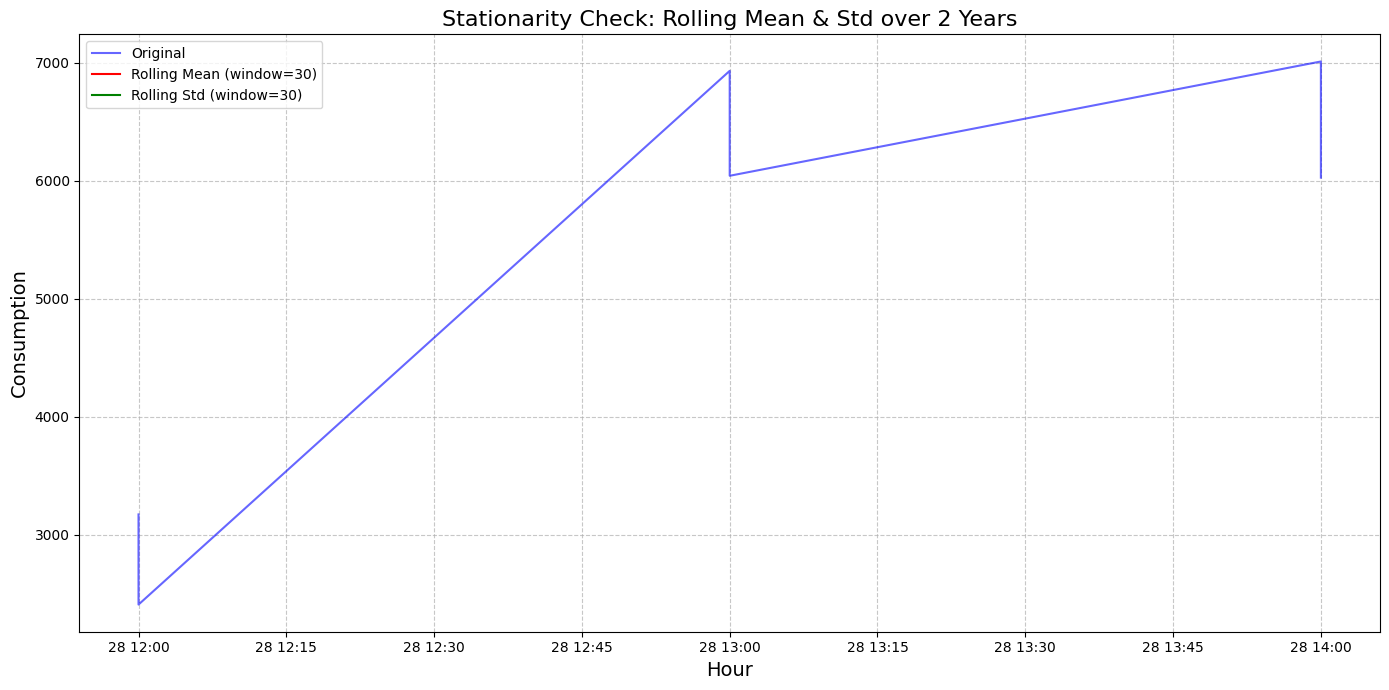

In [50]:
# Since 'Hour' is already the index, we don't need to set it again
# Just make sure the index is in datetime format
df.index = pd.to_datetime(df.index)

# Set appropriate window size
window_size = 30  # Adjust this based on your data frequency

# Calculate rolling mean and standard deviation
rolling_mean = df['Consumption'].rolling(window=window_size).mean()
rolling_std = df['Consumption'].rolling(window=window_size).std()

# Create the plot
plt.figure(figsize=(14, 7))
plt.plot(df['Consumption'], label='Original', color='blue', alpha=0.6)
plt.plot(rolling_mean, label=f'Rolling Mean (window={window_size})', color='red')
plt.plot(rolling_std, label=f'Rolling Std (window={window_size})', color='green')

# Customize the plot
plt.title('Stationarity Check: Rolling Mean & Std over 2 Years', fontsize=16)
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Consumption', fontsize=14)
plt.legend(loc='best')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


ValueError: Unknown format code 'f' for object of type 'str'

<Figure size 1200x600 with 0 Axes>

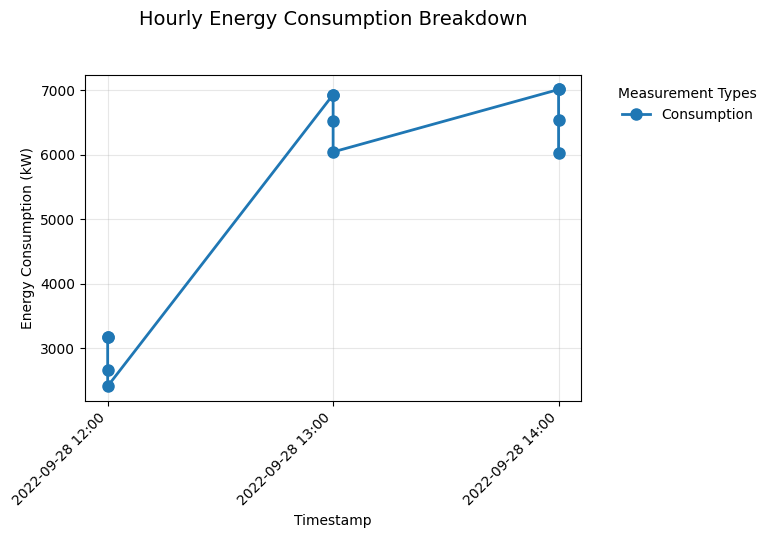

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load your data


# Clean data: drop columns with all NaN values
#df_clean = df.dropna(axis=1, how='all')

# Create visualization
plt.figure(figsize=(12, 6))
ax = df.plot(kind='line', marker='o', linestyle='-', linewidth=2, markersize=8)

# Format x-axis for time series
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Adjust interval based on your data density
plt.xticks(rotation=45)

# Add labels and title
plt.xlabel('Timestamp')
plt.ylabel('Energy Consumption (kW)')
plt.title('Hourly Energy Consumption Breakdown\n', fontsize=14, pad=20)
plt.grid(True, alpha=0.3)

# Improve legend
plt.legend(
    title='Measurement Types',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    frameon=False
)

# Add data labels for non-NaN points
for column in df.columns:
    non_nan_points = df[column].dropna()
    for x, y in zip(non_nan_points.index, non_nan_points.values):
        plt.annotate(
            f"{y:.1f}",
            (x, y),
            textcoords="offset points",
            xytext=(0,5),
            ha='center',
            fontsize=8
        )

plt.tight_layout()
plt.show()
